#**Bioseñales y sistemas**
##**Práctica 3 Parte 1: Análisis estadístico de señales**
####Maria Alejandra Escobar - C.C 1004425012
####Juan Manuel Martínez - C.C 1007739919

##**Librerías**

In [1]:
#Importación de librerías necesarias para el desarrollo de la práctica
import scipy.io as sio
import numpy as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

ModuleNotFoundError: No module named 'scipy'

##**Carga de datos**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ecg=sio.loadmat('C:\Users\Juan Manuel\Desktop\Biosenales_20241\Practica_3\signals.mat')

#**Procedimiento**

###**Implementación de funciónes**

**Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:**

$RMS=((\sum_{n=0}^{N}x^2)/N)^{0.5}$

In [10]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

Para la creación de la función, se utiliza la función size, la cual calcula la cantidad de puntos del vector. Con esta información, se aplica la fórmula que calcula el valor RMS y luego se retorna.

##**Análisis estadístico ECG**

**Creación del vector tiempo a partir de la información suministrada en el archivo .mat**

In [5]:
t=(1/1024)
Vtiempo=np.arange(0,ecg['ECG_asRecording'].size*t,t)
tiempo_total = Vtiempo[-1]
print('El tiempo total de la señal es',tiempo_total)
print(Vtiempo)
print(len(Vtiempo))

[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
30720


**Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG**

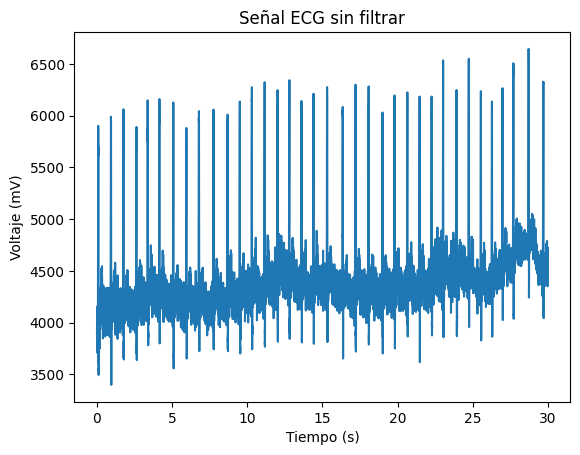

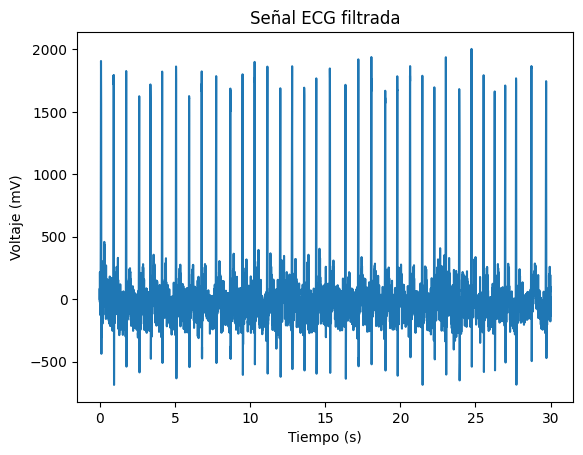

In [6]:
plt.plot(Vtiempo,ecg['ECG_asRecording'][0,:30720])
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Señal ECG sin filtrar')
plt.show()

plt.plot(Vtiempo,ecg['ECG_filtered'][0,:30720])
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Señal ECG filtrada')
plt.show()

*Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.*

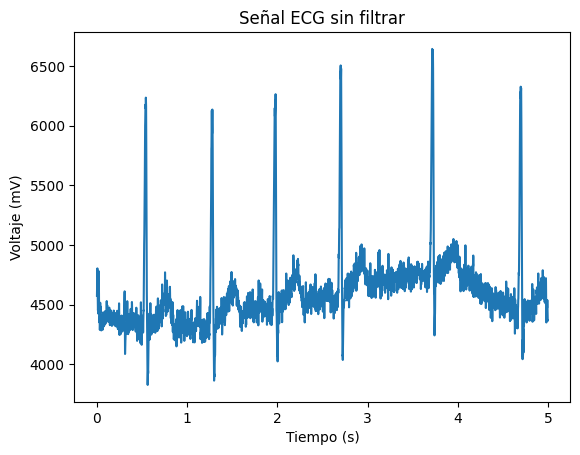

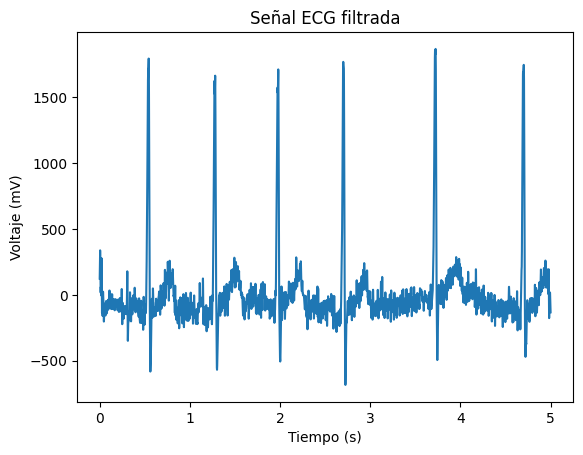

In [7]:
Vtiempo2=np.arange(0,(ecg['ECG_asRecording'].size/6)*t,t)
plt.plot(Vtiempo2,ecg['ECG_asRecording'][0,25600:30720])
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Señal ECG sin filtrar')
plt.show()

plt.plot(Vtiempo2,ecg['ECG_filtered'][0,25600:30720])
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Señal ECG filtrada')
plt.show()

*Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.*

**Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.**

Valor máximo entre 0 y 0.5 segundos de la señal original:  5900.6142578125
Indice de este valor en la señal:  88
Valor máximo entre 0.5 y 1 segundo de la señal original:  5988.81884765625
Indice de este valor en la señal:  953


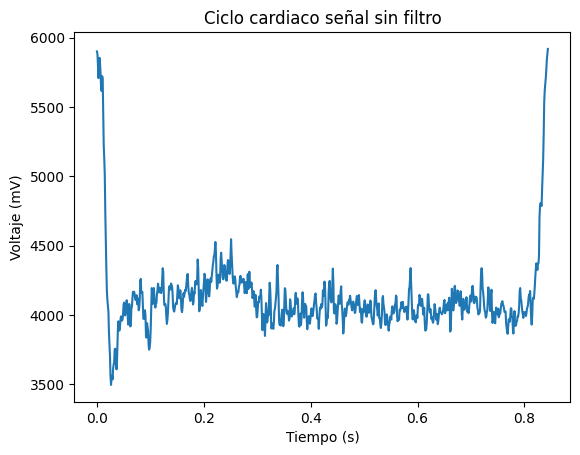

In [12]:
from operator import index
rec1=ecg['ECG_asRecording'][0,:512] #Creación de un arreglo desde 0 hasta medio segundo, pues en 30 segundos hay 30720.
max1=np.max(rec1)  # Se busca el valor máximo en rec1.
index_max1=rec1.tolist().index(max1)
print('Valor máximo entre 0 y 0.5 segundos de la señal original: ', max1)
print('Indice de este valor en la señal: ', index_max1)

rec2=ecg['ECG_asRecording'][0,512:1024] #Se creó un arreglo desde 0.5 hasta 1 segundo.
max2=np.max(rec2) #Se busca el valor máximo en rec2
rec22=ecg['ECG_asRecording'][0,:1024]  #Se creó un arreglo desde 0 hasta un segundo.
index_max2=np.argmax(rec22==5988.81884765625) #busco el índice del valor máximo hallado.
print('Valor máximo entre 0.5 y 1 segundo de la señal original: ', max2)
print('Indice de este valor en la señal: ', index_max2)

ciclo=ecg['ECG_asRecording'][0,index_max1:index_max2]

Vtiempo3=np.arange(0,ciclo.size*t,t)
plt.plot(Vtiempo3,ciclo)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Ciclo cardiaco señal sin filtro')
plt.show()

In [11]:
Rms_1= calcularRMS(ciclo)
promedio=np.mean(ciclo)
varianza=np.var(ciclo)
print("El valor RMS es: " ,Rms_1)
print("El promedio es: ",promedio)
print("La varianza es: ",varianza)

El valor RMS es:  4142.454957820607
El promedio es:  4131.136266878161
La varianza es:  93646.2220564969


*Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.*

**Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.**

Valor máximo entre 0 y 0.5 segundos de la señal filtrada:  1906.7260952319396
Indice de este valor en la señal:  88
Valor máximo entre 0.5 y 1 segundo de la señal original:  1794.5044897028638
Indice de este valor en la señal:  952


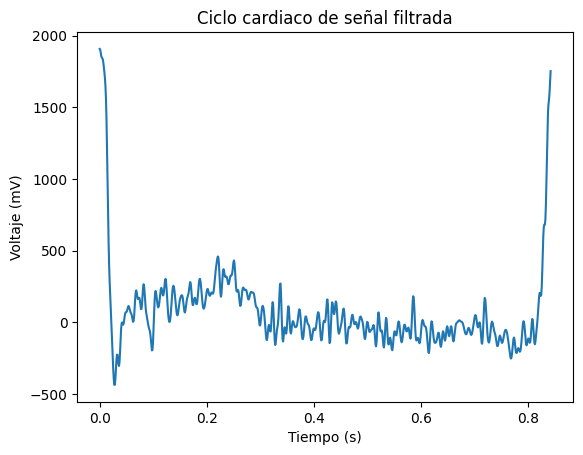

In [13]:
from operator import index
rec1f=ecg['ECG_filtered'][0,:512] #Se creó un arreglo desde 0 hasta medio segundo, sabiendo que por 30 segundos hay 30720.
max1f=np.max(rec1f)  # Se busca el valor máximo en rec1f.
index_max1f=rec1f.tolist().index(max1f)
print('Valor máximo entre 0 y 0.5 segundos de la señal filtrada: ', max1f)
print('Indice de este valor en la señal: ', index_max1f)

rec2f=ecg['ECG_filtered'][0,512:1024] #Se creó un arreglo desde 0.5 hasta 1 segundo.
max2f=np.max(rec2f) #Se busca el valor máximo en rec2f
rec22f=ecg['ECG_filtered'][0,:1024]  #Se creó un arreglo desde 0 hasta un segundo.
index_max2f=np.argmax(rec22f==1794.5044897028638) #busco el índice del valor máximo hallado.
print('Valor máximo entre 0.5 y 1 segundo de la señal original: ', max2f)
print('Indice de este valor en la señal: ', index_max2f)

ciclof=ecg['ECG_filtered'][0,index_max1f:index_max2f]

Vtiempo4=np.arange(0,ciclof.size*t,t)
plt.plot(Vtiempo4,ciclof)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Ciclo cardiaco de señal filtrada')
plt.show()

In [14]:
Rms_f=calcularRMS(ciclof)
promediof=np.mean(ciclof)
varianzaf=np.var(ciclof)
print("El valor RMS es: " ,Rms_f)
print("El promedio es: ",promediof)
print("La varianza es: ",varianzaf)


El valor RMS es:  319.62757818893766
El promedio es:  74.00995782055861
La varianza es:  96684.31488232457


*Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.*

**Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?**